In [22]:
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from util import *
from data import read_games

In [23]:
# Data
import os
data_directory = os.getcwd() + '/../../bin/'
# print(data_directory)
games_data = read_games(data_directory)

# print(games_data.head())
# print(games_data.columns)

def get_count_on_columns(data, group_column_name, count_column_name):
    return data.groupby([group_column_name])[count_column_name].count().reset_index().rename(columns={count_column_name : 'Count'})

games_count_by_genre_and_year = games_data.groupby(['Genre', 'Release Year'])['User Rating'].mean()
# games_count_by_genre = games_data.groupby(['Genre'])['Game Name'].count().reset_index().rename(columns={'Game Name' : 'Count'})
games_count_by_genre = get_count_on_columns(games_data, 'Genre', 'Game Name')

print(games_count_by_genre)

           Genre  Count
0         Action    340
1      Adventure    342
2       Fighting    337
3         Horror    356
4     Platformer    338
5         Puzzle    384
6         Racing    369
7   Role-playing    360
8        Shooter    337
9     Simulation    368
10        Sports    403
11       Stealth    360
12      Strategy    353
13      Survival    353


Text(0, 0.5, 'Count')

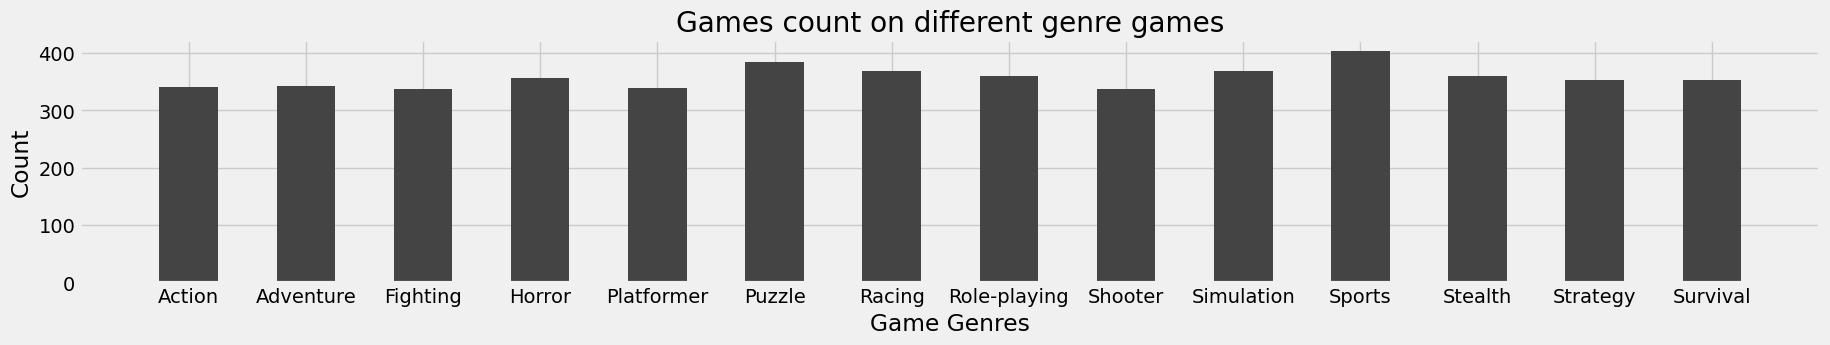

In [24]:
# Bar plot
## here counting on different genres

# operations available:
## width
## interval width
## title and legend
## ticks(value labels on the axis)

plt.style.use('fivethirtyeight')

plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(games_count_by_genre['Genre'], games_count_by_genre['Count'], color='#444444', label='User Ratings', align='center', width=0.5)

plt.title('Games count on different genre games')
plt.xlabel('Game Genres')
plt.ylabel('Count')

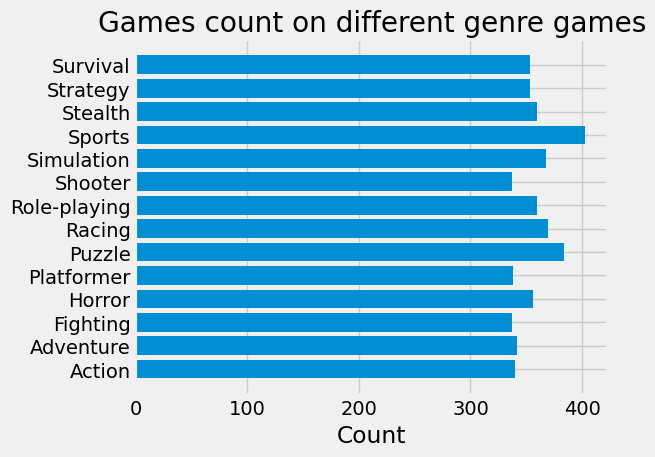

In [25]:
# Horizontal plot
## Usually for lots of data categories to avoid overcrowding

plt.barh(games_count_by_genre['Genre'], games_count_by_genre['Count'])

plt.title('Games count on different genre games')
plt.xlabel('Count')

plt.tight_layout()

{'PC', 'Nintendo Switch', 'PlayStation', 'Xbox', 'Mobile'}
        Genre  Count
0      Action     79
1   Adventure     59
2    Fighting     71
3      Horror     82
4  Platformer     74
        Genre  Count
0      Action     60
1   Adventure     73
2    Fighting     77
3      Horror     71
4  Platformer     66
        Genre  Count
0      Action     59
1   Adventure     65
2    Fighting     54
3      Horror     53
4  Platformer     68


Text(0, 0.5, 'Count')

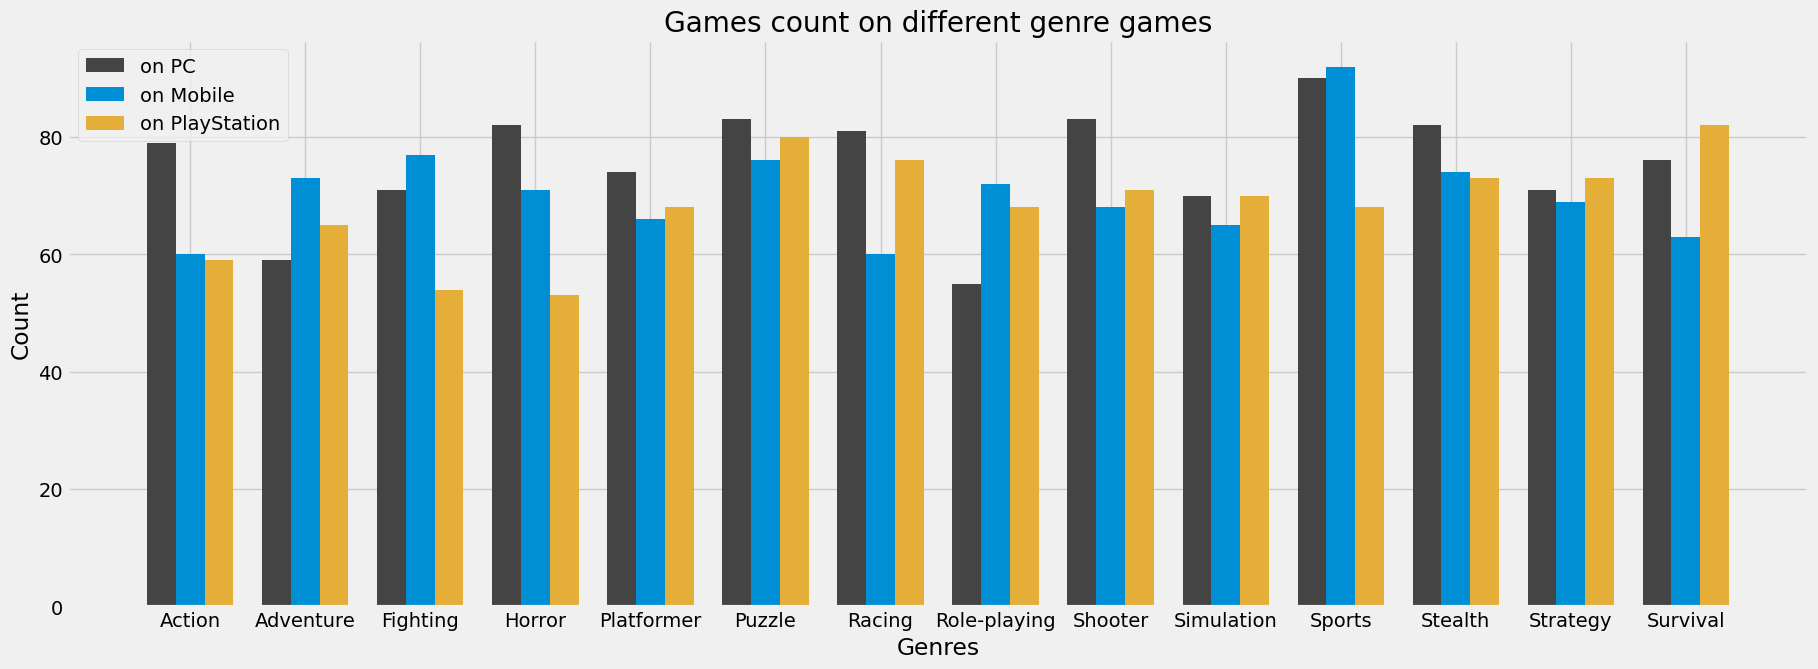

In [26]:
# Bar charts of multiple categories parallel comparison
## Here genres on each platforms

platforms = set(games_data['Platform'])
print(platforms)

## Take only PC, mobile and PlayStation for representative
games_count_by_genre = get_count_on_columns(games_data, 'Genre', 'Game Name')

# games_count_by_genre_on_pc = games_data[games_data['Platform'] == 'PC'].groupby(['Genre'])['User Rating'].mean().reset_index()
# games_count_by_genre_on_mobile = games_data[games_data['Platform'] == 'Mobile'].groupby(['Genre'])['User Rating'].mean().reset_index()
# games_count_by_genre_on_playstation = games_data[games_data['Platform'] == 'PlayStation'].groupby(['Genre'])['User Rating'].mean().reset_index()

games_count_by_genre_on_pc = get_count_on_columns(games_data[games_data['Platform'] == 'PC'], 'Genre', 'Game Name')
games_count_by_genre_on_mobile = get_count_on_columns(games_data[games_data['Platform'] == 'Mobile'], 'Genre', 'Game Name')
games_count_by_genre_on_playstation = get_count_on_columns(games_data[games_data['Platform'] == 'PlayStation'], 'Genre', 'Game Name')

print(games_count_by_genre_on_pc.head())
print(games_count_by_genre_on_mobile.head())
print(games_count_by_genre_on_playstation.head())

## manually creating space for different bar plots
## by shifting columns and spaces parallel.
x_indexes = np.arange(len(games_count_by_genre_on_pc['Genre']))
width = 0.25
space = 0.25

plt.figure(figsize=(20, 7))  # width:20, height:3

plt.bar(x_indexes - space, games_count_by_genre_on_pc['Count'], width=width, color='#444444', label='on PC')
plt.bar(x_indexes, games_count_by_genre_on_mobile['Count'], width=width, color='#008fd5', label='on Mobile')
plt.bar(x_indexes + space, games_count_by_genre_on_playstation['Count'], width=width, color='#e5ae38', label='on PlayStation')

plt.legend()
plt.title('Games count on different genre games')
plt.xticks(ticks=x_indexes, labels=games_count_by_genre_on_pc['Genre'])
plt.xlabel('Genres')
plt.ylabel('Count')